In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, UpSampling2D
from tensorflow.keras.layers import InputLayer, Conv2DTranspose
from tensorflow.keras.layers import Activation, Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array
from skimage.color import rgb2lab, lab2rgb, rgb2gray, xyz2lab
from skimage.io import imsave
import numpy as np
import os
import random

In [6]:
# Get images
image = img_to_array(load_img('images/woman.jpg'))
image = np.array(image, dtype=float)

In [7]:
X = rgb2lab(1.0/255*image)[:,:,0]
Y = rgb2lab(1.0/255*image)[:,:,1:]
Y /= 128
X = X.reshape(1, 400, 400, 1)
Y = Y.reshape(1, 400, 400, 2)

In [8]:
# Building the neural network
model = Sequential()
model.add(InputLayer(input_shape=(None, None, 1)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))

In [9]:
model.compile(optimizer='rmsprop',loss='mse')

In [10]:
model.fit(x=X, y=Y, batch_size=1, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 4s 4s/step - loss: 0.2770
Epoch 2/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.9445
Epoch 3/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.8434
Epoch 4/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0849
Epoch 5/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.2186
Epoch 6/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0201
Epoch 7/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0110
Epoch 8/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.0085
Epoch 9/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0077
Epoch 10/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0071
Epoch 11/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.0064
Epoch 12/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0057
Epoch 13/1000
1/1 [====================

1/1 [==============================] - 0s 15ms/step - loss: 0.0035
Epoch 103/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.0027
Epoch 104/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0026
Epoch 105/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0033
Epoch 106/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0028
Epoch 107/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0025
Epoch 108/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0025
Epoch 109/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0025
Epoch 110/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0023
Epoch 111/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0022
Epoch 112/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0021
Epoch 113/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0023
Epoch 114/1000
1/1 [===========

1/1 [==============================] - 0s 13ms/step - loss: 0.0028
Epoch 203/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0018
Epoch 204/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0016
Epoch 205/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0015
Epoch 206/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.0014
Epoch 207/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0014
Epoch 208/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0014
Epoch 209/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.0015
Epoch 210/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0018
Epoch 211/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0024
Epoch 212/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0023
Epoch 213/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0018
Epoch 214/1000
1/1 [===========

1/1 [==============================] - 0s 14ms/step - loss: 0.0013
Epoch 303/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0015
Epoch 304/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.0016
Epoch 305/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0012
Epoch 306/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0011
Epoch 307/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0013
Epoch 308/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.0015
Epoch 309/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0013
Epoch 310/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0011
Epoch 311/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0013
Epoch 312/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.0018
Epoch 313/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0013
Epoch 314/1000
1/1 [===========

1/1 [==============================] - 0s 16ms/step - loss: 0.0014
Epoch 401/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0012
Epoch 402/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0010
Epoch 403/1000
1/1 [==============================] - 0s 12ms/step - loss: 8.4738e-04
Epoch 404/1000
1/1 [==============================] - 0s 12ms/step - loss: 7.6860e-04
Epoch 405/1000
1/1 [==============================] - 0s 12ms/step - loss: 7.7396e-04
Epoch 406/1000
1/1 [==============================] - 0s 13ms/step - loss: 7.6389e-04
Epoch 407/1000
1/1 [==============================] - 0s 13ms/step - loss: 8.1172e-04
Epoch 408/1000
1/1 [==============================] - 0s 13ms/step - loss: 8.9605e-04
Epoch 409/1000
1/1 [==============================] - 0s 12ms/step - loss: 9.0542e-04
Epoch 410/1000
1/1 [==============================] - 0s 13ms/step - loss: 9.2330e-04
Epoch 411/1000
1/1 [==============================] - 0s 13ms/step - loss: 9.0022

1/1 [==============================] - 0s 13ms/step - loss: 7.0611e-04
Epoch 497/1000
1/1 [==============================] - 0s 17ms/step - loss: 7.8376e-04
Epoch 498/1000
1/1 [==============================] - 0s 13ms/step - loss: 8.0261e-04
Epoch 499/1000
1/1 [==============================] - 0s 16ms/step - loss: 9.0051e-04
Epoch 500/1000
1/1 [==============================] - 0s 13ms/step - loss: 9.2073e-04
Epoch 501/1000
1/1 [==============================] - 0s 12ms/step - loss: 8.7309e-04
Epoch 502/1000
1/1 [==============================] - 0s 15ms/step - loss: 6.3804e-04
Epoch 503/1000
1/1 [==============================] - 0s 13ms/step - loss: 5.8514e-04
Epoch 504/1000
1/1 [==============================] - 0s 13ms/step - loss: 5.8150e-04
Epoch 505/1000
1/1 [==============================] - 0s 14ms/step - loss: 7.0458e-04
Epoch 506/1000
1/1 [==============================] - 0s 12ms/step - loss: 9.2007e-04
Epoch 507/1000
1/1 [==============================] - 0s 14ms/step - 

1/1 [==============================] - 0s 13ms/step - loss: 4.9211e-04
Epoch 593/1000
1/1 [==============================] - 0s 14ms/step - loss: 5.3502e-04
Epoch 594/1000
1/1 [==============================] - 0s 18ms/step - loss: 5.5666e-04
Epoch 595/1000
1/1 [==============================] - 0s 14ms/step - loss: 7.0955e-04
Epoch 596/1000
1/1 [==============================] - 0s 13ms/step - loss: 8.0669e-04
Epoch 597/1000
1/1 [==============================] - 0s 12ms/step - loss: 8.7535e-04
Epoch 598/1000
1/1 [==============================] - 0s 12ms/step - loss: 8.2125e-04
Epoch 599/1000
1/1 [==============================] - 0s 18ms/step - loss: 7.1057e-04
Epoch 600/1000
1/1 [==============================] - 0s 15ms/step - loss: 5.9061e-04
Epoch 601/1000
1/1 [==============================] - 0s 33ms/step - loss: 5.2168e-04
Epoch 602/1000
1/1 [==============================] - 0s 21ms/step - loss: 5.0052e-04
Epoch 603/1000
1/1 [==============================] - 0s 22ms/step - 

1/1 [==============================] - 0s 14ms/step - loss: 8.0433e-04
Epoch 688/1000
1/1 [==============================] - 0s 14ms/step - loss: 8.6765e-04
Epoch 689/1000
1/1 [==============================] - 0s 12ms/step - loss: 7.5254e-04
Epoch 690/1000
1/1 [==============================] - 0s 17ms/step - loss: 4.6430e-04
Epoch 691/1000
1/1 [==============================] - 0s 13ms/step - loss: 4.1411e-04
Epoch 692/1000
1/1 [==============================] - 0s 14ms/step - loss: 4.4695e-04
Epoch 693/1000
1/1 [==============================] - 0s 12ms/step - loss: 5.4564e-04
Epoch 694/1000
1/1 [==============================] - 0s 14ms/step - loss: 8.3728e-04
Epoch 695/1000
1/1 [==============================] - 0s 14ms/step - loss: 7.8117e-04
Epoch 696/1000
1/1 [==============================] - 0s 18ms/step - loss: 5.2785e-04
Epoch 697/1000
1/1 [==============================] - 0s 14ms/step - loss: 4.4793e-04
Epoch 698/1000
1/1 [==============================] - 0s 15ms/step - 

1/1 [==============================] - 0s 15ms/step - loss: 0.0020
Epoch 783/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0012
Epoch 784/1000
1/1 [==============================] - 0s 12ms/step - loss: 8.2471e-04
Epoch 785/1000
1/1 [==============================] - 0s 12ms/step - loss: 5.3341e-04
Epoch 786/1000
1/1 [==============================] - 0s 13ms/step - loss: 4.8290e-04
Epoch 787/1000
1/1 [==============================] - 0s 14ms/step - loss: 4.3401e-04
Epoch 788/1000
1/1 [==============================] - 0s 13ms/step - loss: 4.2291e-04
Epoch 789/1000
1/1 [==============================] - 0s 16ms/step - loss: 4.4613e-04
Epoch 790/1000
1/1 [==============================] - 0s 14ms/step - loss: 4.7344e-04
Epoch 791/1000
1/1 [==============================] - 0s 13ms/step - loss: 4.8621e-04
Epoch 792/1000
1/1 [==============================] - 0s 13ms/step - loss: 4.9870e-04
Epoch 793/1000
1/1 [==============================] - 0s 13ms/step - loss: 4.

1/1 [==============================] - 0s 16ms/step - loss: 0.0010
Epoch 878/1000
1/1 [==============================] - 0s 16ms/step - loss: 7.5899e-04
Epoch 879/1000
1/1 [==============================] - 0s 16ms/step - loss: 4.8609e-04
Epoch 880/1000
1/1 [==============================] - 0s 15ms/step - loss: 4.1020e-04
Epoch 881/1000
1/1 [==============================] - 0s 14ms/step - loss: 3.8988e-04
Epoch 882/1000
1/1 [==============================] - 0s 17ms/step - loss: 3.7810e-04
Epoch 883/1000
1/1 [==============================] - 0s 24ms/step - loss: 3.9598e-04
Epoch 884/1000
1/1 [==============================] - 0s 16ms/step - loss: 4.3002e-04
Epoch 885/1000
1/1 [==============================] - 0s 14ms/step - loss: 4.7632e-04
Epoch 886/1000
1/1 [==============================] - 0s 14ms/step - loss: 4.9450e-04
Epoch 887/1000
1/1 [==============================] - 0s 13ms/step - loss: 4.5028e-04
Epoch 888/1000
1/1 [==============================] - 0s 15ms/step - loss

1/1 [==============================] - 0s 14ms/step - loss: 4.8377e-04
Epoch 973/1000
1/1 [==============================] - 0s 13ms/step - loss: 4.3332e-04
Epoch 974/1000
1/1 [==============================] - 0s 13ms/step - loss: 4.4147e-04
Epoch 975/1000
1/1 [==============================] - 0s 12ms/step - loss: 4.5443e-04
Epoch 976/1000
1/1 [==============================] - 0s 12ms/step - loss: 5.4750e-04
Epoch 977/1000
1/1 [==============================] - 0s 12ms/step - loss: 4.8666e-04
Epoch 978/1000
1/1 [==============================] - 0s 12ms/step - loss: 4.2768e-04
Epoch 979/1000
1/1 [==============================] - 0s 12ms/step - loss: 3.6022e-04
Epoch 980/1000
1/1 [==============================] - 0s 16ms/step - loss: 3.6265e-04
Epoch 981/1000
1/1 [==============================] - 0s 13ms/step - loss: 3.8916e-04
Epoch 982/1000
1/1 [==============================] - 0s 13ms/step - loss: 4.2127e-04
Epoch 983/1000
1/1 [==============================] - 0s 14ms/step - 

In [11]:
print(model.evaluate(X, Y, batch_size=1))
output = model.predict(X)
output *= 128
# Output colorizations
cur = np.zeros((400, 400, 3))
cur[:,:,0] = X[0][:,:,0]
cur[:,:,1:] = output[0]

1/1 [==============================] - 0s 281ms/step - loss: 6.6463e-04
0.000664633815176785


In [14]:
import cv2
# imsave("img_result.png", lab2rgb(cur))
# imsave("img_gray_version.png", rgb2gray(lab2rgb(cur)))
result = lab2rgb(cur)
cv2.imshow("result", cv2.cvtColor(lab2rgb(cur).astype('float32'), cv2.COLOR_RGB2BGR))
cv2.imshow("result gray", rgb2gray(lab2rgb(cur)))
cv2.waitKey()
cv2.destroyAllWindows()

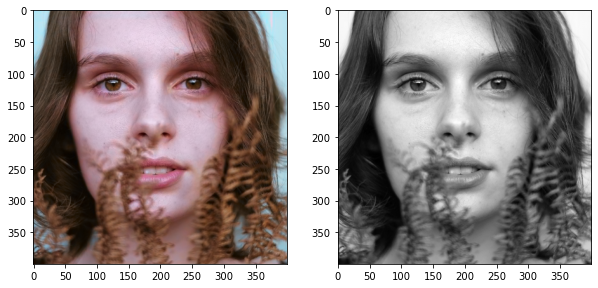

In [24]:
import matplotlib.pyplot as plt

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.imshow(lab2rgb(cur), cmap='brg')
ax2.imshow(rgb2gray(lab2rgb(cur)), cmap ='gray')